# Exploratory Data Analysis (Análisis Exploratorio de Datos)


## ¿De qué se tratan mis datos?

- Primera aproximación/revisión de los datos a procesar

- Examinar propiedades de los datos, lo que permite identificar posibles patrones y relaciones en los datos

- Permite estimar estadísticas de los datos que podrían ser útiles (datos faltantes, detectar valores atípicos, seleccionar características más relevantes)

- Permite sacar conclusiones "rápidas" de la viabilidad de la tarea a resolver con los datos a mano

- ¡Más un arte que una ciencia!

Para lo anterior es muy útil tener un objetivo de **qué** se desea hacer con los datos establecido previamente, por ejemplo, predecir a un término, discriminar clases, identificar comunidades dentro de los datos, entre otros.

## Primera revisión:

- ¿Cuántos elementos en total son? ¿son pocos? ¿son demasiados (RAM)?

- ¿Tenemos filas completas o hay valores faltantes?

- ¿Las características son cuantitativas o cualitativas? ¿qué tipo de dato tienen?

- ¿Tengo un problema supervisado o no supervisado?

- En el caso supervisado, ¿Cuál es mi columna de salida? ¿tenemos un problema de regresión o clasificación (binario o multiclase)?

- ¿Las características siguen alguna distribución? ¿Cuáles parecen ser importantes? 

- ¿Existe alguna correlación entre características? ¿Podemos descartar características?

- ¿Hay datos atípicos? ¿son datos reales o errores de digitación? ¿debemos eliminarlos o los conservamos?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datos

En este cuaderno se trabajará con el conjunto de datos _House Prices - Advanced Regression Techniques_ alojado en Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques). Este conjunto de datos contiene 79 características (continuas y discretas) que describen aspectos de casas residenciales, la tarea es predecir el precio final de cada casa.

Cargaremos los datos en un objeto `dataframe` de `Pandas`

In [2]:
df = pd.read_csv("./data/train.csv",index_col=0)
print(f'Cantidad de filas: {df.shape[0]} y columnas: {df.shape[1]}')

Cantidad de filas: 1460 y columnas: 80


Podemos ver los primeros N registros con `df.head(N)` (si no se ingresa N, el valor por defecto es 5):

In [6]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


También podemos listar los nombres de las columnas, con el atributo `.columns`:

Nota: para mayor descripción acerca de cada columna revisar el archivo _'./data/data_description.txt'_

In [8]:
print("Nombres de las columnas: ", df.columns)

Nombres de las columnas:  Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'

Adicionalmente, podemos inspeccionar para cada columna si presenta datos nulos y qué tipo de dato son con `df.info()`:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## Estadísticas Generales

El método `describe()` presenta estadísticas básicas para las columnas numéricas

In [10]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Para explorar más a fondo el conjunto de características, separaremos las características numéricas y las categóricas. 

Nota: Algunas características con valores enteros, a pesar de ser numéricas, pueden ser categóricas, y algunas variables categóricas pueden ser texto.

In [11]:
numerical_features_all = df.select_dtypes(include=np.number).columns
print('Columnas numéricas:',numerical_features_all)
df_num = df[numerical_features_all]

categorical_features_all = df.select_dtypes(include='object').columns
print('\nColumnas categóricas:',categorical_features_all)

Columnas numéricas: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Columnas categóricas: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1'

In [12]:
for c in numerical_features_all:
    print(f'{c}: \t min:', df[c].min(), '\tmax:', df[c].max())

MSSubClass: 	 min: 20 	max: 190
LotFrontage: 	 min: 21.0 	max: 313.0
LotArea: 	 min: 1300 	max: 215245
OverallQual: 	 min: 1 	max: 10
OverallCond: 	 min: 1 	max: 9
YearBuilt: 	 min: 1872 	max: 2010
YearRemodAdd: 	 min: 1950 	max: 2010
MasVnrArea: 	 min: 0.0 	max: 1600.0
BsmtFinSF1: 	 min: 0 	max: 5644
BsmtFinSF2: 	 min: 0 	max: 1474
BsmtUnfSF: 	 min: 0 	max: 2336
TotalBsmtSF: 	 min: 0 	max: 6110
1stFlrSF: 	 min: 334 	max: 4692
2ndFlrSF: 	 min: 0 	max: 2065
LowQualFinSF: 	 min: 0 	max: 572
GrLivArea: 	 min: 334 	max: 5642
BsmtFullBath: 	 min: 0 	max: 3
BsmtHalfBath: 	 min: 0 	max: 2
FullBath: 	 min: 0 	max: 3
HalfBath: 	 min: 0 	max: 2
BedroomAbvGr: 	 min: 0 	max: 8
KitchenAbvGr: 	 min: 0 	max: 3
TotRmsAbvGrd: 	 min: 2 	max: 14
Fireplaces: 	 min: 0 	max: 3
GarageYrBlt: 	 min: 1900.0 	max: 2010.0
GarageCars: 	 min: 0 	max: 4
GarageArea: 	 min: 0 	max: 1418
WoodDeckSF: 	 min: 0 	max: 857
OpenPorchSF: 	 min: 0 	max: 547
EnclosedPorch: 	 min: 0 	max: 552
3SsnPorch: 	 min: 0 	max: 508
Screen

## Estadística Univariada: Gráficos básicos

Mediante el método `value_counts()` retorna los valores únicos de la característica (columna) objetivo y calcula el conteo por cada uno.

**Nota:** Estas gráficas ignoran valores nulos o faltantes. 

In [13]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Con **gráficos de barras (bar plots)** se pueden mostrar los conteos de las variables categóricas o numéricas.

<Axes: xlabel='MSZoning'>

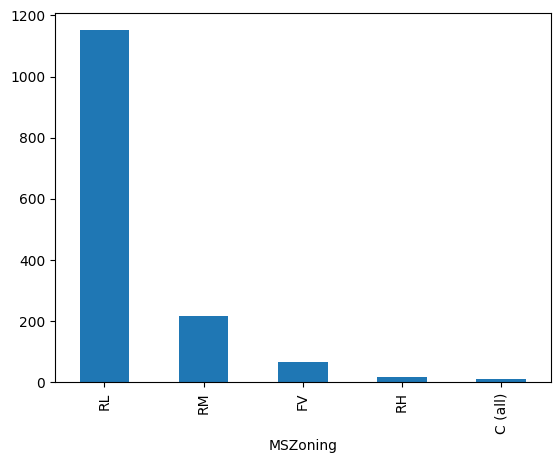

In [14]:
df['MSZoning'].value_counts().plot.bar()

<Axes: xlabel='YearBuilt'>

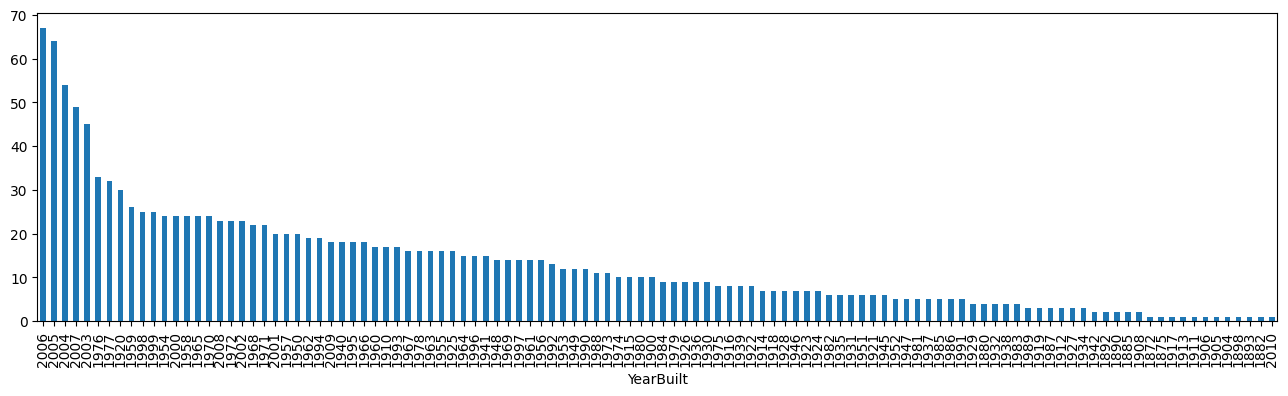

In [16]:
fig, ax = plt.subplots(figsize=(16,4)) 
df['YearBuilt'].sort_values().value_counts().plot.bar(ax = ax)

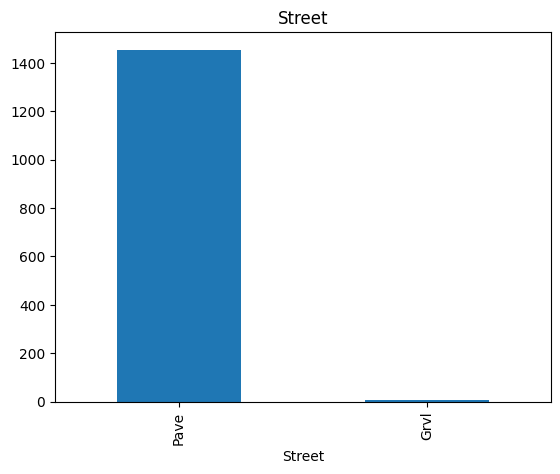

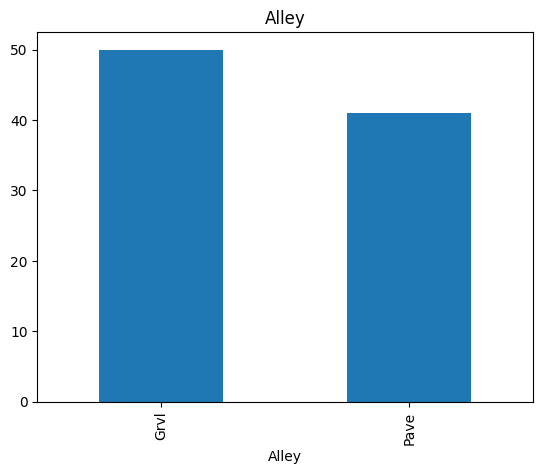

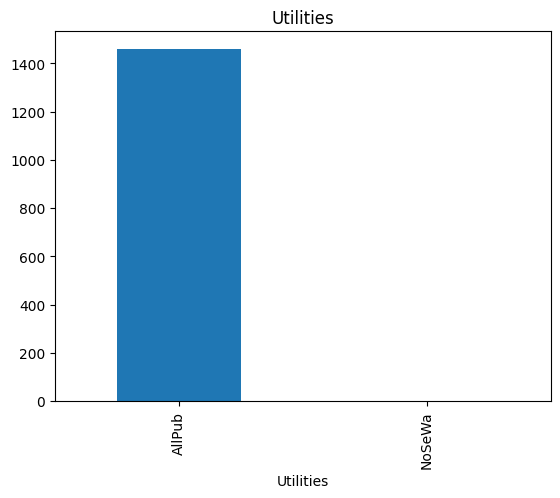

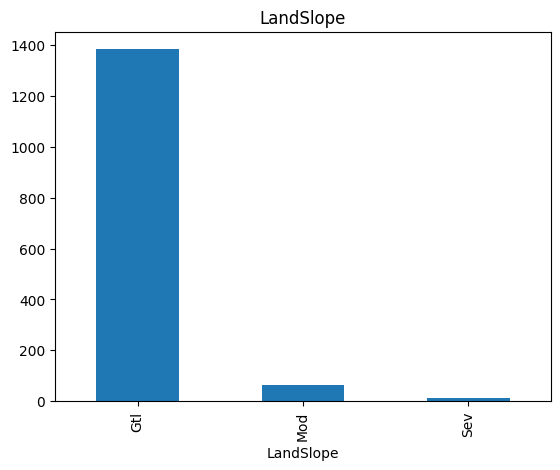

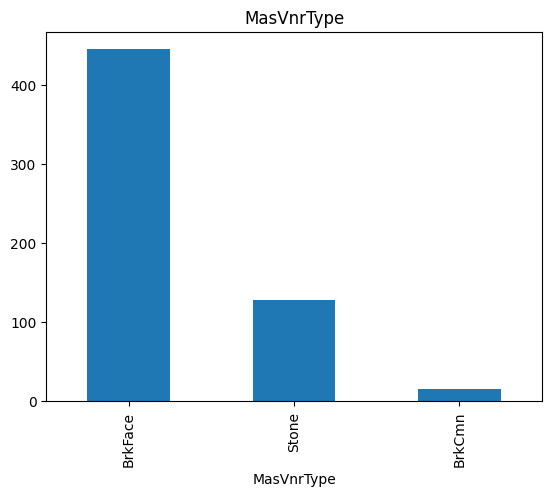

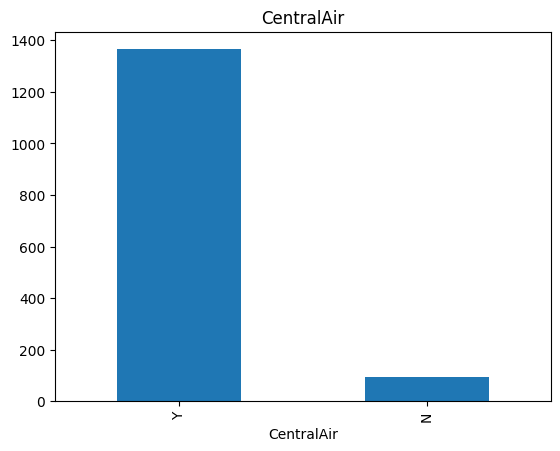

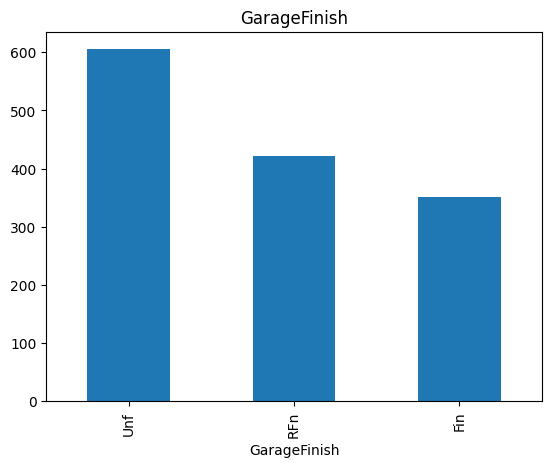

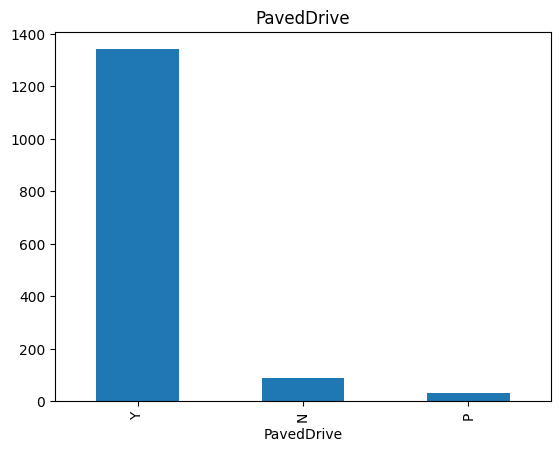

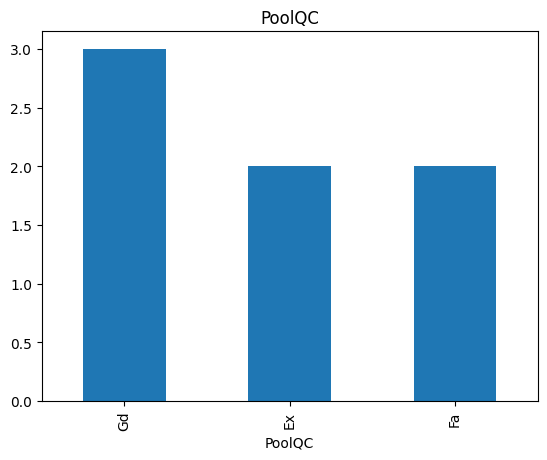

In [13]:
for c in categorical_features_all:
    if len(df[c].value_counts()) < 4:
        df[c].value_counts().plot.bar(title=c)
        plt.show()

Con **histogramas (histograms)** se muestra la distribución de características numéricas en intervalos (bins).

<Axes: >

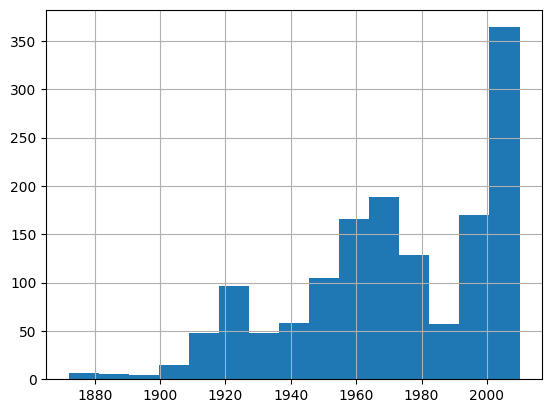

In [19]:
df['YearBuilt'].hist(bins=15)

<Axes: xlabel='SalePrice', ylabel='Count'>

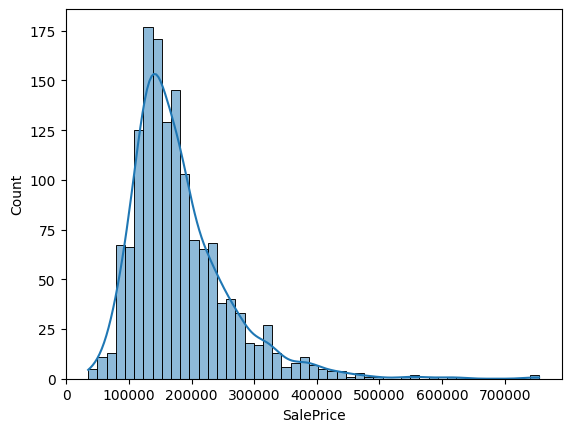

In [20]:
sns.histplot(df["SalePrice"], kde=True)

Con **Gráficas de pastel (pie plots)** muestra la distribución de una característica de manera proporcional a su valor.

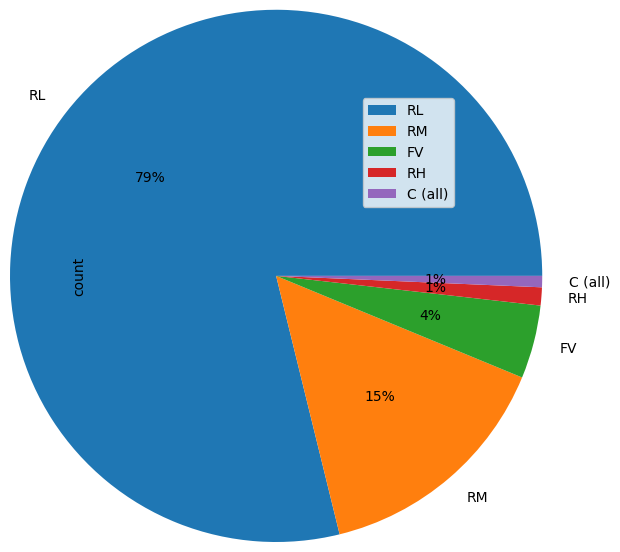

In [21]:
df['MSZoning'].value_counts().plot.pie(autopct='%1.0f%%', radius=1.8)
plt.legend()

<Axes: ylabel='count'>

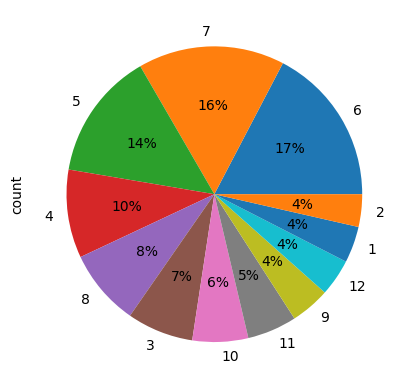

In [22]:
df['MoSold'].sort_values().value_counts().plot.pie(autopct='%1.0f%%')

<Axes: ylabel='count'>

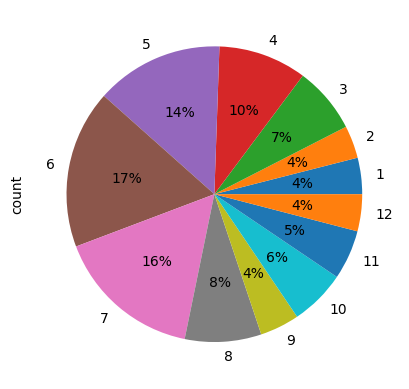

In [23]:
df['MoSold'].sort_values().value_counts().reindex(range(1,13)).plot.pie(autopct='%1.0f%%')

Podemos usar cajas de dispersión (boxplot) para inspeccionar visualmente la distribución de alguna (o algunas) característica(s).

C:\Users\abelo\anaconda3\envs\IA_ITM\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='YearRemodAdd'>

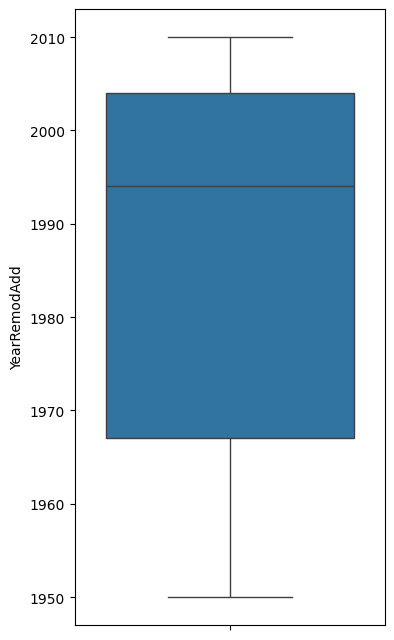

In [26]:
fig, ax = plt.subplots(figsize=(4,8))
sns.boxplot(df_num['YearRemodAdd'])

## Estadísticas Multivariadas: Gráficas de dispersión y correlación

Las **Gráficas de dispersión (scatter plots)** son gráficas en 2 dimensiones que pueden ser utilizadas para explorar la relación entre dos variables numéricas.

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

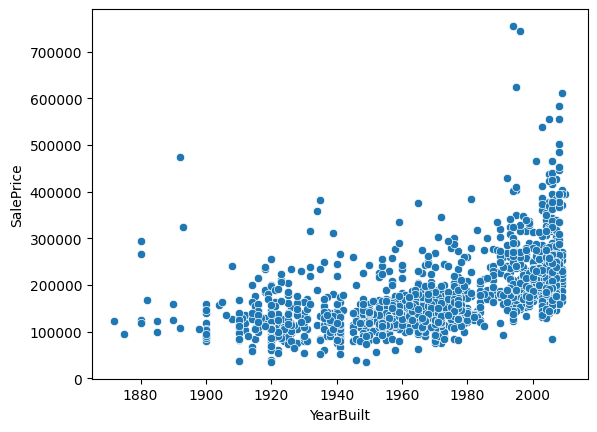

In [20]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)

También podemos usar **Boxplots** para relacionar dos características

C:\Users\abelo\anaconda3\envs\IA_ITM\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

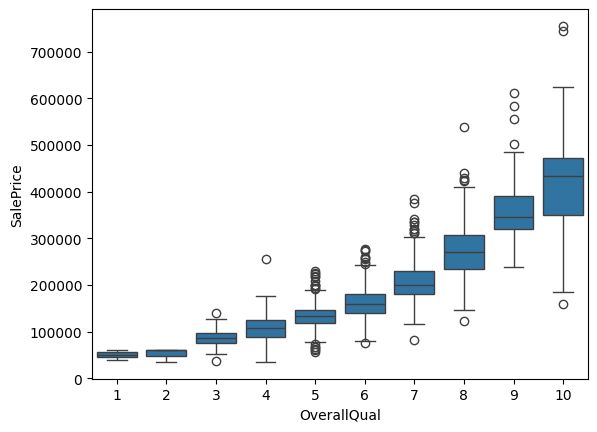

In [27]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

Con las características numéricas podemos calcular la correlación en parejas como una **matriz de correlación**. Con esto podemos hacer una análisis más objetivo de las características y la relacion entre ellas.

Con la librería `Seaborn` mostrar esto como un mapa de calor. _¿Qué indica la correlación?_

<Axes: >

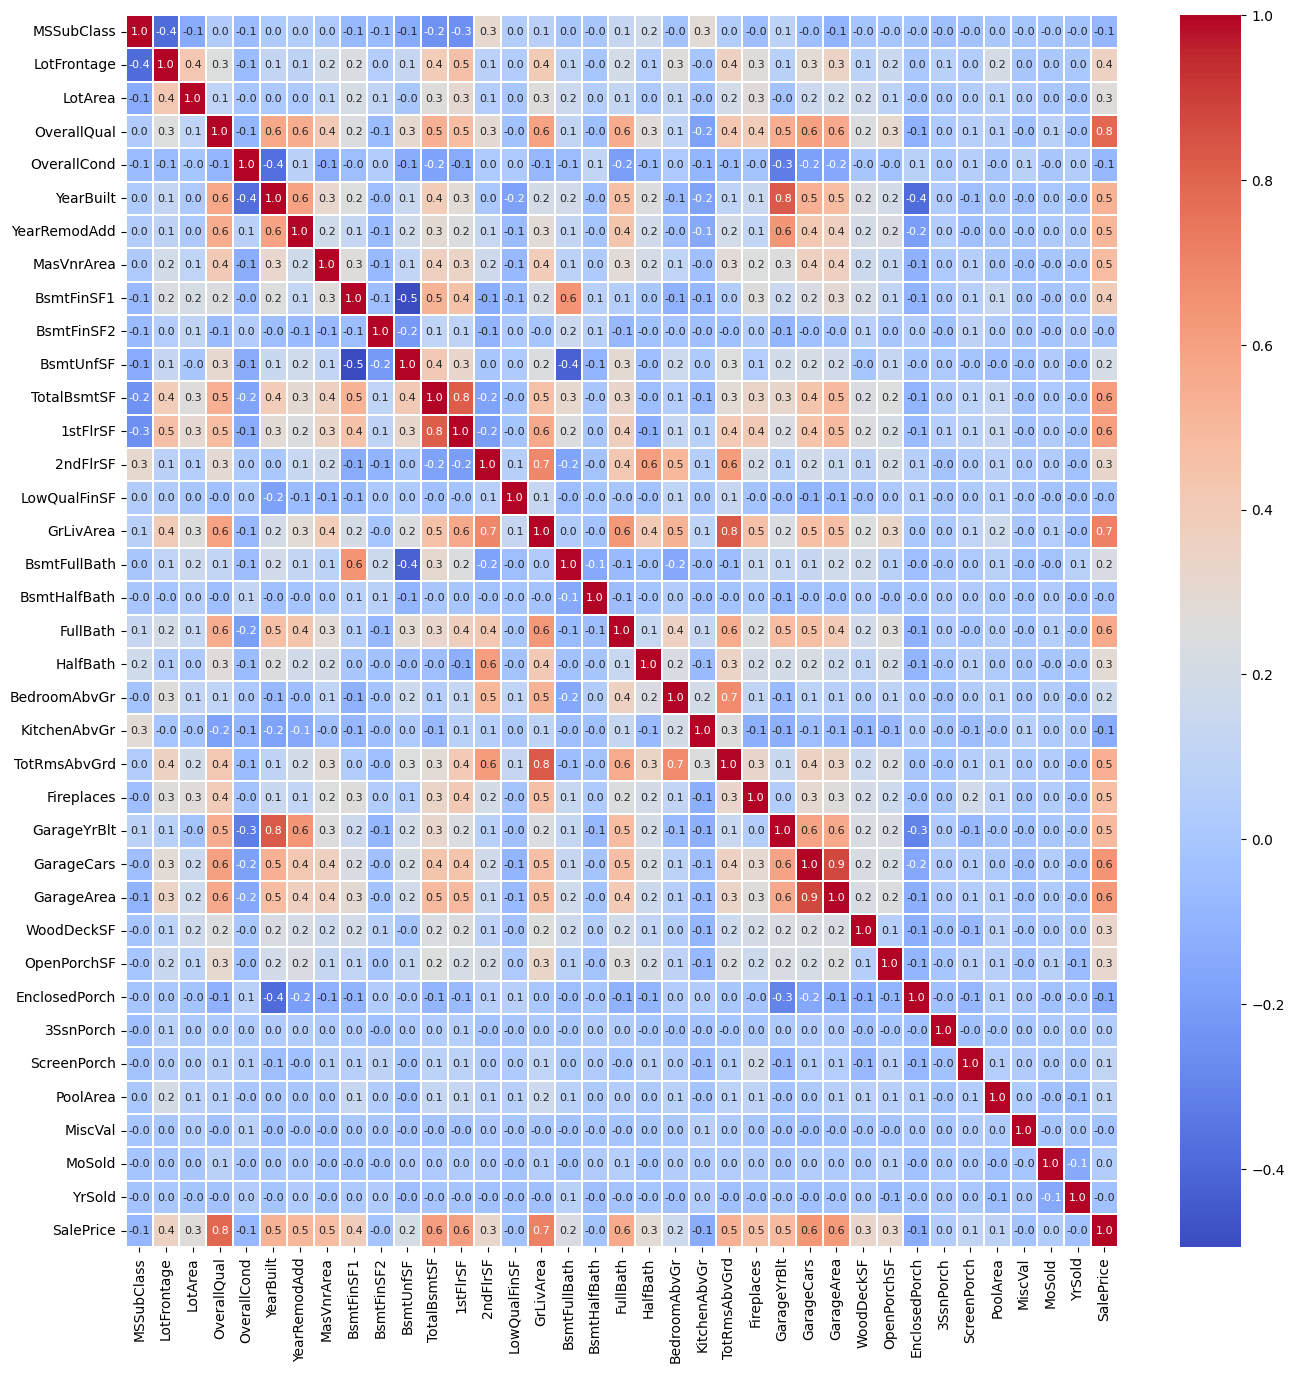

In [30]:
mat_corr = df_num.corr()

fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(mat_corr, annot = True, ax = ax, linewidths= .1, annot_kws={"fontsize":8}, fmt='.1f', cmap='coolwarm')

Otra forma de verla para no redundar información:

<Axes: >

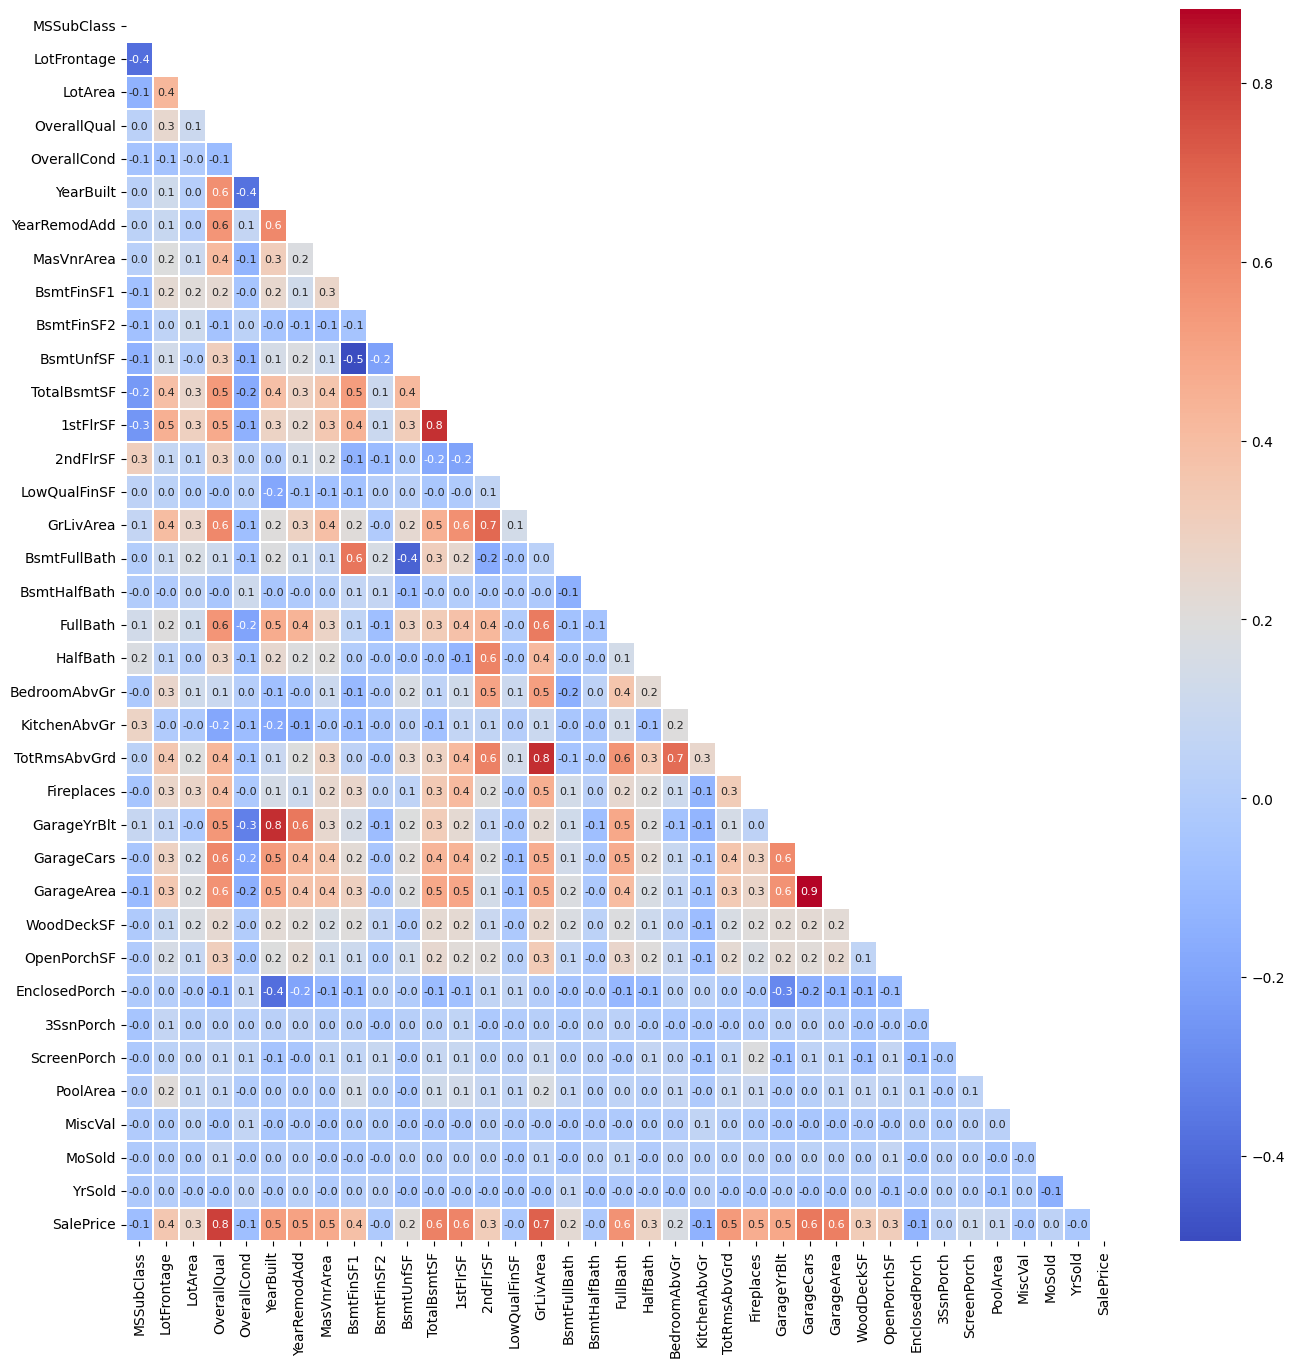

In [31]:
mask = np.triu(np.ones_like(mat_corr, dtype=bool))
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(mat_corr, annot = True, ax = ax, linewidths= .1, annot_kws={"fontsize":8}, fmt='.1f', cmap='coolwarm', mask=mask)

Matriz de correlación reducida

<Axes: >

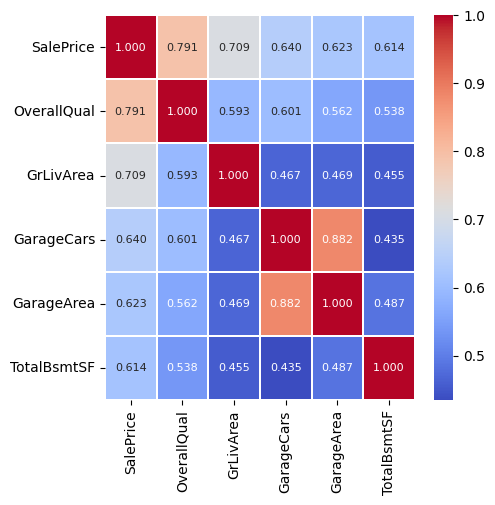

In [35]:
k = 5
cols = mat_corr.nlargest(k+1, 'SalePrice')
idx = cols.index
mat_corr_r = np.corrcoef(df[idx].values.T)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat_corr_r, annot = True, ax = ax, linewidths= .1, annot_kws={"fontsize":8}, 
            fmt='.3f', cmap='coolwarm',yticklabels = idx.values, xticklabels = idx.values)


Podemos listar la correlación de una variable con respecto a las demás

In [36]:
corr = df_num.corr()
corr[['SalePrice']].sort_values(by = 'SalePrice',ascending = False).style.background_gradient(cmap='coolwarm')

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


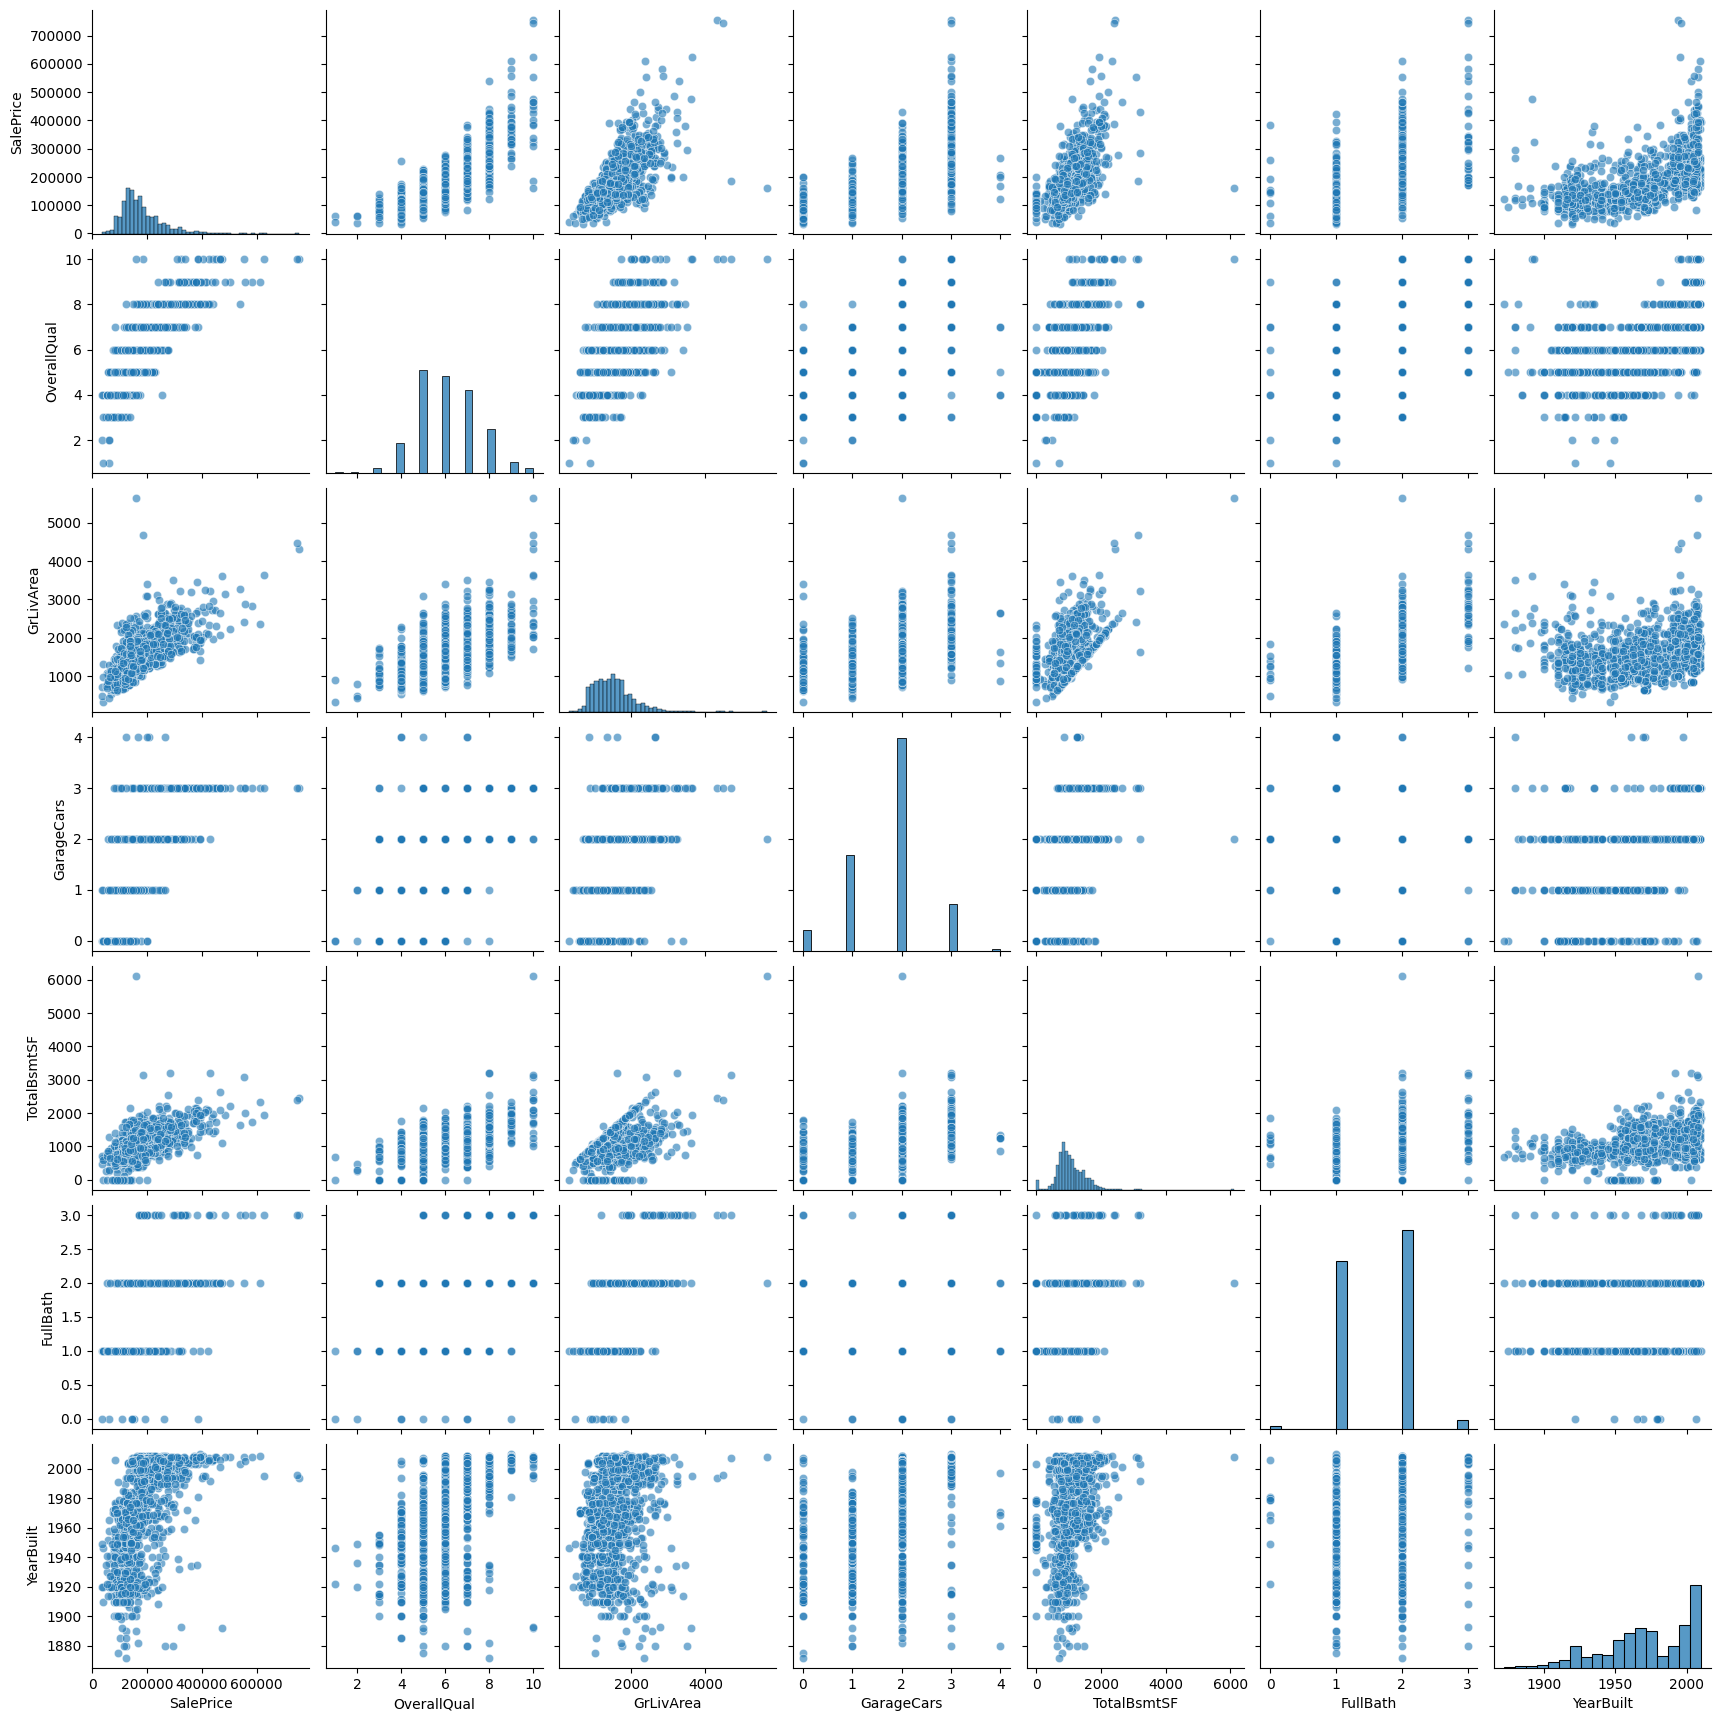

In [37]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols],plot_kws={'alpha': 0.6})

## Limpieza de Datos

### Manejo de valores faltantes

Podemos calcular el número de valores faltantes (NaN) para cada característica con el método `isna()`, el cual retorna `True` si el valor es NaN, `False` en otro caso.

In [38]:
num_nan = df.isna().sum()
# print(num_nan.to_string())
print(num_nan[num_nan != 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Podemos descartar las características/columnas si pensamos que hay una cantidad significativa de datos faltantes. Esto es a elección del analista, en nuestro caso removeremos aquellas características con más de 20 % de valores faltantes.

**Nota:** remover características puede reducir la información de los datos, pudiendo llevar a obtener modelos de inteligencia artificial subajustados, que no logran capturar patrones en los datos.

In [39]:
# Porcentaje de valores perdidos
num_nan[num_nan != 0] / df.shape[0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [40]:
umbral = 0.2
col_remover = df.loc[:,num_nan / df.shape[0] >= umbral].columns
print(f'Columnas a remover: {col_remover}')

Columnas a remover: Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [41]:
df_new = df.drop(col_remover, axis=1)
print(df_new.shape)
df_new.head()

(1460, 74)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Para los valores faltantes restantes, vamos a borrar los elementos (filas) que tengan valores nulos.

In [42]:
num_nan = df_new.isna().sum()
# print(num_nan.to_string())
print(num_nan[num_nan != 0])

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [43]:
num_nan[num_nan != 0].index

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [44]:
df_new[num_nan[num_nan != 0].index].isna()

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
Id,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,False,False,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
df_new_ = df_new.dropna(subset=num_nan[num_nan != 0].index, how='any')
df_new_

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


De esta manera ya no quedamos con datos faltantes:

In [46]:
df_new_.isnull().sum().max()


0

**CONSULTA**: Como alternativa a remover los elementos (o características) que contienen datos faltantes, se puede realizar una imputación de datos. Consultar en qué consiste y posibles formas de hacerlo.